## Implementation

In [1]:
from IOHMM import IOHMM_model
import numpy as np, pandas as pd
import torch
import matplotlib.pyplot as plt

In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 30.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 2.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.4 MB/s eta 0:00:00


In [2]:
data = pd.read_csv("data/world.csv")
data.head()
data = data.dropna()

input = torch.tensor(np.array(data[['Open']]), dtype=torch.float32)
output = torch.tensor(np.array(data['Close']), dtype=torch.float32)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 25562: invalid start byte

# Example 1

## Set up a simple model manully

In [6]:
transition_matrix = torch.tensor([[[1.,0.],[1.,0.]],[[1.,0.],[1.,0.]]])
emission_matrix = torch.tensor([[-0.1,0.1],[0.1,0.1]])

IOHMM = IOHMM_model(num_states=2, inputs=input[:100], outputs=output[:100], max_iter=1000, tol=1e-4, transition_matrix=transition_matrix, emission_matrix=emission_matrix)
print(IOHMM.initial_pi)
print(IOHMM.transition_matrix)
print(IOHMM.emission_matrix)
print(IOHMM.lsd)

Parameter containing:
tensor([0.5000, 0.5000], requires_grad=True)
Parameter containing:
tensor([[[1., 0.],
         [1., 0.]],

        [[1., 0.],
         [1., 0.]]], requires_grad=True)
Parameter containing:
tensor([[-0.1000,  0.1000],
        [ 0.1000,  0.1000]], requires_grad=True)
Parameter containing:
tensor([5., 5.], requires_grad=True)


In [7]:
print(IOHMM._forward())
# torch.sum(IOHMM._forward(), dim=1)

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5

In [8]:
print(IOHMM._backward())
# torch.sum(IOHMM._backward(), dim=1)

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5

In [9]:
print(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_gamma(IOHMM._forward(), IOHMM._backward()), dim=1)

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5

In [10]:
print(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()))
# torch.sum(IOHMM._compute_xi(IOHMM._forward(), IOHMM._backward()), axis=1)

tensor([[[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5000]],

        [[0.5000, 0.5000],
         [0.5000, 0.5

In [11]:
IOHMM._baum_welch()

Iteration 1, likelihood: -inf
Iteration 2, likelihood: -139.14013671875
Iteration 3, likelihood: -139.0100860595703
Iteration 4, likelihood: -138.90835571289062
Iteration 5, likelihood: -138.82461547851562
Iteration 6, likelihood: -138.7548065185547
Iteration 7, likelihood: -138.96234130859375
Iteration 8, likelihood: -188.30345153808594
Iteration 9, likelihood: -2879.89599609375
Iteration 10, likelihood: -996.3734130859375
Iteration 11, likelihood: 0.12623682618141174
Iteration 12, likelihood: 0.16413447260856628
Iteration 13, likelihood: 0.1993139088153839
Iteration 14, likelihood: 0.23214204609394073
Iteration 15, likelihood: 0.26291584968566895
Iteration 16, likelihood: 0.2918790578842163
Iteration 17, likelihood: 0.3192342519760132
Iteration 18, likelihood: 0.34515172243118286
Iteration 19, likelihood: 0.36977601051330566
Iteration 20, likelihood: 0.39323073625564575
Iteration 21, likelihood: 0.4156225323677063
Iteration 22, likelihood: 0.43704408407211304
Iteration 23, likelihood

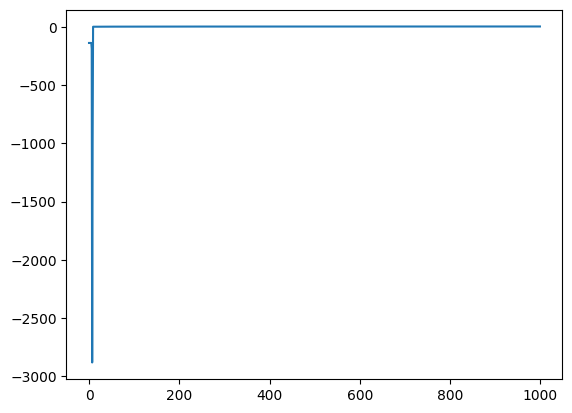

In [12]:
plt.plot(IOHMM.history)

## See the training results

In [13]:
print("Initial pi")
print(IOHMM.initial_pi) # to normalize
print("Transition matrix")
print(IOHMM.transition_matrix)
print("Emission matrix")
print(IOHMM.emission_matrix)
print("Sd")
print(IOHMM.lsd)

Initial pi
Parameter containing:
tensor([10.0265, 10.0138], requires_grad=True)
Transition matrix
Parameter containing:
tensor([[[-4.1765, -7.3129],
         [ 6.1765,  7.3129]],

        [[ 3.2650,  3.1951],
         [-1.2650, -3.1951]]], requires_grad=True)
Emission matrix
Parameter containing:
tensor([[-0.0992,  0.1012],
        [ 0.1007,  0.1010]], requires_grad=True)
Sd
Parameter containing:
tensor([5.0019, 5.0014], requires_grad=True)


## Viterbi

In [14]:
#call the viterbi algorithm
IOHMM.viterbi()

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1]

## Predict

In [21]:
# predict the next output given the next input
IOHMM.predict(input[100])


tensor(0.2074, grad_fn=<SumBackward0>)

In [22]:
output[100]

tensor(1.9927)